In [259]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

To determine the critical value $t_c$, the transformation method was applied to $g(t|H_0)$. This was done by taking the integral with respect to t, with bounds from $t_c$ to infinity, and setting it equal to 0.05 (the maximum allowed value for the C.I.). By applying the bounds and rearranging for $t_c$, $t_c$ was found to be $\frac{-1}{4}ln(1-\frac{0.2}{a})$, where $a$ is a normalization constant.

Using the normalization condition (i.e. an integral from 0 to 1 of the pdf for $H_0$ and setting it equal to 1) produced a value for $a$ of 4.075.

Therefore $t_c$ is approximately 0.674 at an alpha of 0.95

In [260]:
def nextValueForH0(p):
    #The general form for t, found analytically
    t = -(1/4) * np.log(1 - 4*p/4.075) 
    return t

In [261]:
#Formula for method 2 pdf
def nextValueForH1(t):
    g = 2 * (np.sin(np.pi * t) ** 2)
    return g

### Method 1

In [262]:
#Constants
method_1 = []
method_2 = []

In [263]:
#Finding t values for random p 10000 times
for i in range(10000):
    p = random.random()
    method_1.append(nextValueForH0(p))

In [264]:
count_1 = 0
t_c = 0.674 #The critical t value
#Checking to see which values are accepted
for i in method_1:
    if i < t_c:
        count_1 += 1

### Method 2

In [265]:
#Constants
t_min = 0.
t_max = 1.
counter = 0
count_2 = 0

In [266]:
while counter < 10000:
    #Ensuring 10000 events occur
    #Using acceptance rejection method
    r1 = random.random()
    r2 = random.random()
    t_trial = t_min + (t_max-t_min) * r1
    g_trial = nextValueForH1(t_trial)
    if g_trial > 2 * r2:
        method_2.append(t_trial)
        counter += 1

In [267]:
#Seeing which values are less than t crit
for j in method_2:
    if j < t_c:
        count_2 += 1

In [268]:
#Exact behaviour of the given pdfs; used to compare the data
t = np.linspace(0,1,100)
g_1 = 4.075*np.exp(-4*t)
g_2 = []
for i in t:
    g_2.append(nextValueForH1(i))

### Plotting and analysis

In [269]:
print("Method 1 produced", 10000 - count_1, "successful events")
print("Method 2 produced", count_2, "successful events")

Method 1 produced 475 successful events
Method 2 produced 8231 successful events


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


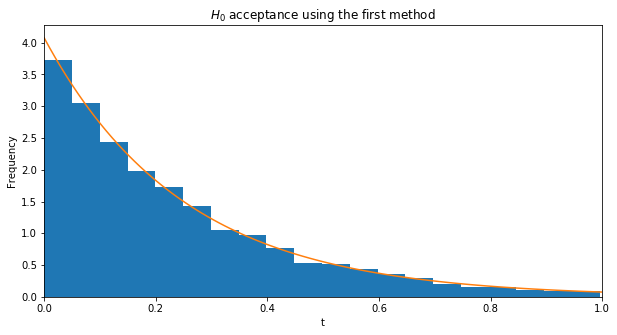

In [270]:
plt.figure(figsize=(10,5))
plt.hist(method_1, bins = 20, normed = True)
plt.xlim(0,1)
plt.plot(t,g_1)
plt.title('$H_0$ acceptance using the first method')
plt.xlabel('t')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


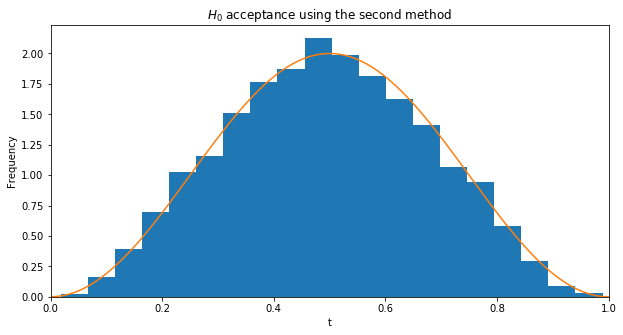

In [271]:
plt.figure(figsize=(10,5))
plt.hist(method_2, bins = 20, normed = True)
plt.plot(t,g_2)
plt.xlim(0,1)
plt.title('$H_0$ acceptance using the second method')
plt.xlabel('t')
plt.ylabel('Frequency')
plt.show()